In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for visualization 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


In [2]:
#Read the test file and train file into dataframes
X_full = pd.read_csv('/kaggle/input/30-days-of-ml/train.csv') #Include target (y)
X = pd.read_csv('/kaggle/input/30-days-of-ml/train.csv') #Target y dropped
X_test = pd.read_csv('/kaggle/input/30-days-of-ml/test.csv')

In [3]:
#Check to see if there's any null values
print("The number of N/A values in the training\
 dataset is " + str(X.columns.isnull().any().sum()))
#Perfect data without any null values
print("The number of N/A values in the testing\
 dataset is " + str(X_test.columns.isnull().sum()))

The number of N/A values in the training dataset is 0
The number of N/A values in the testing dataset is 0


In [4]:
#Desriptive statistics (count, mean, max, std, etc.) to understand the training file
alldtypes = ['object', 'int','float']
X.describe(include = alldtypes)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
unique,NaN,2,2,2,4,4,4,8,8,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,A,A,A,C,B,B,A,E,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,193130,154824,253886,263356,294737,149340,290511,276040,111103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,250018.576947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634


In [5]:
#Checking the data for descriptive statistics of the test dataset
X_test.describe(include = alldtypes)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,200000.000000,200000,200000,200000,200000,200000,200000,200000,200000,200000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
unique,NaN,2,2,2,4,4,4,8,8,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,A,A,A,C,B,B,A,E,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,128830,103174,169377,175480,196535,100175,193519,183796,74310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,249970.884580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.492200,0.509944,0.468050,0.537617,0.497587,0.474630,0.473625,0.473589,0.492756,0.508303
std,144169.245904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.240251,0.228100,0.210167,0.218197,0.239337,0.217558,0.255307,0.221844,0.247105,0.222977
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255903,0.045921,-0.224613,0.203763,-0.260236,0.117894,0.048734,0.052615,-0.074201,0.151052
25%,125316.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.284188,0.353682,0.342813,0.356482,0.332762,0.306940,0.274991,0.308495,0.288094,0.300697
50%,249997.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.395080,0.488378,0.429819,0.505216,0.438716,0.434610,0.460042,0.433857,0.422065,0.472446
75%,374649.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.697252,0.668586,0.573861,0.703289,0.605368,0.610768,0.690143,0.642201,0.711038,0.758496


In [6]:
#Separate the target (dependent variable) into a different variable and drop it
#from the training dataset (in turn modifying the dataset)
y = X.target
X.drop('target',axis = 'columns', inplace=True)

In [7]:
#See the first few rows from X dataset
X.head(n=10)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1,B,B,B,C,B,B,A,E,C,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,2,B,B,A,A,B,D,A,F,A,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,3,A,A,A,C,B,D,A,D,A,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,4,B,B,A,C,B,D,A,E,C,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,6,A,A,A,C,B,D,A,E,A,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823
5,7,A,B,A,C,B,D,A,E,G,...,0.530250,0.392432,0.658169,0.997473,0.569874,0.960864,0.238050,0.316065,0.731729,0.694719
6,8,B,A,A,A,B,D,A,E,C,...,0.281511,0.396705,0.273454,0.824573,0.656325,0.677114,0.808445,0.615973,0.631677,0.283561
7,9,A,A,A,C,B,B,A,E,A,...,0.763081,0.633353,0.339760,0.802006,1.010997,0.391221,0.057297,0.591120,0.074629,0.775869
8,10,A,B,A,C,B,D,A,E,G,...,0.281110,0.472564,0.414036,0.809142,1.013301,0.761183,1.041711,0.393960,0.782381,0.865610
9,11,A,A,A,A,B,B,A,E,E,...,0.287109,0.425716,0.233705,0.493036,0.353048,0.334675,0.085087,0.230634,0.636732,0.291874


In [8]:
#Plotting order for categorical variables
orders = []
for i, cname in enumerate(X.select_dtypes('object')):
    orders.append(X[cname].unique())
    orders[i].sort()

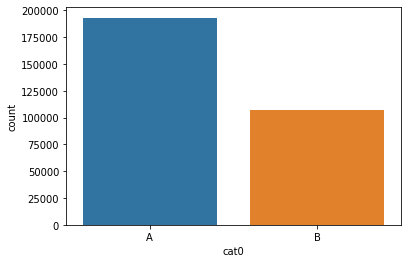

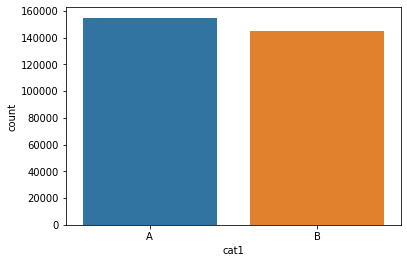

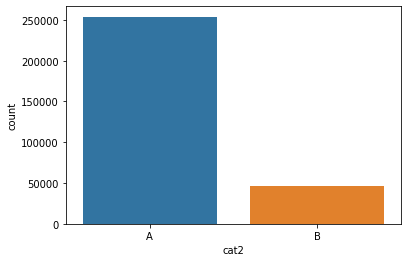

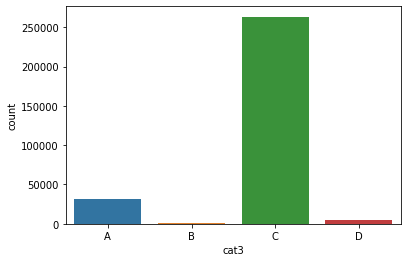

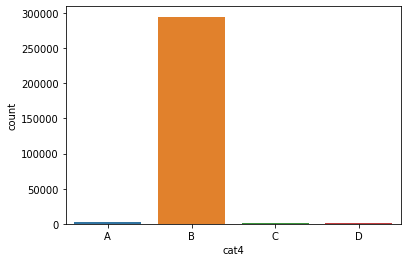

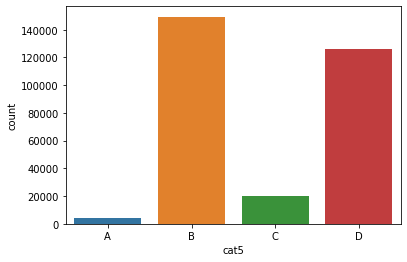

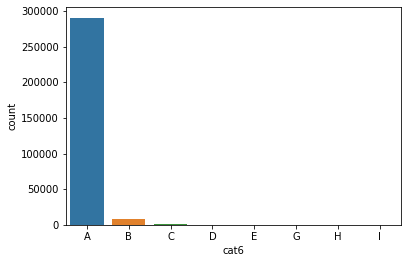

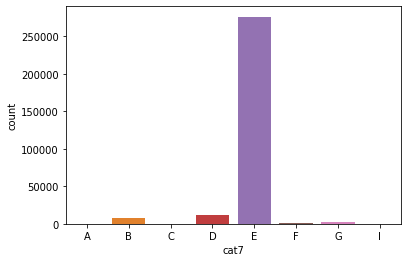

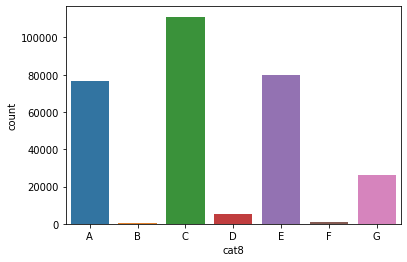

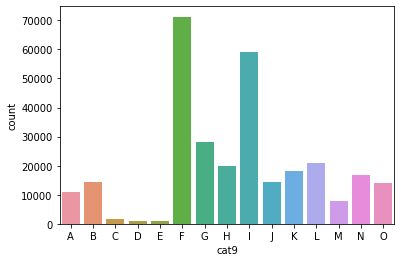

In [9]:
#Visualizations to understand the different independent variables
#See the categorical variables ('object' type)
for i, cname in enumerate(X.select_dtypes('object')):
    plt.figure(i) #Create a new figure for each graph
    sns.countplot(x = cname, data = X, order = orders[i])

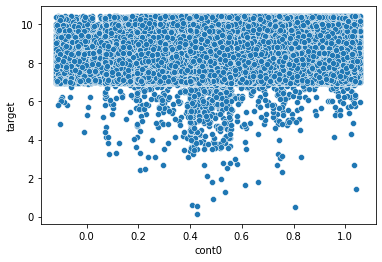

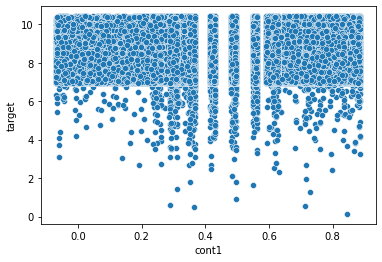

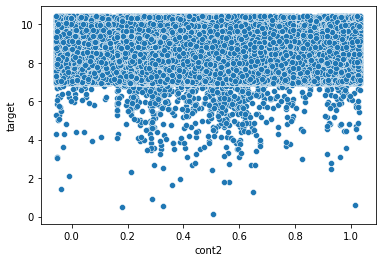

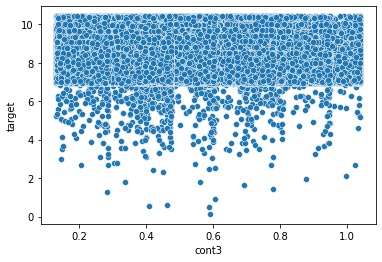

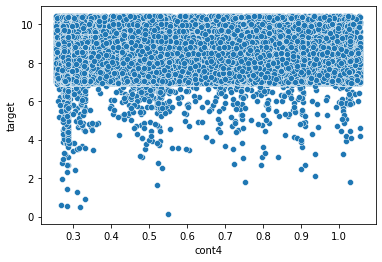

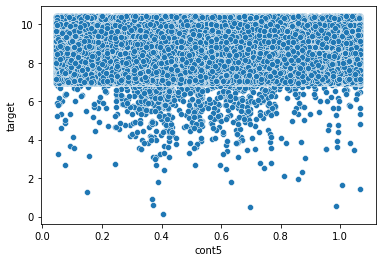

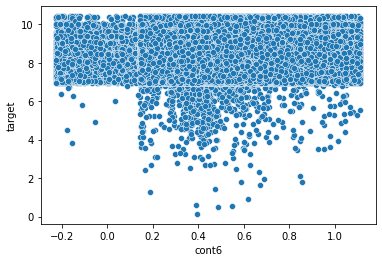

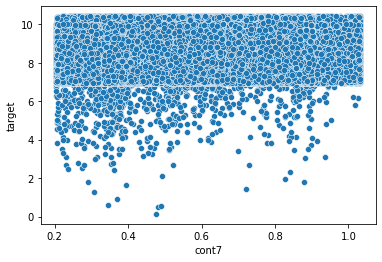

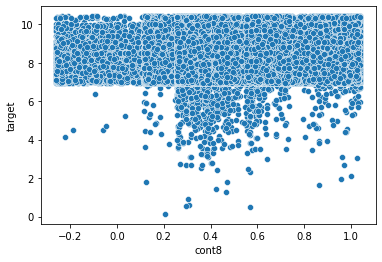

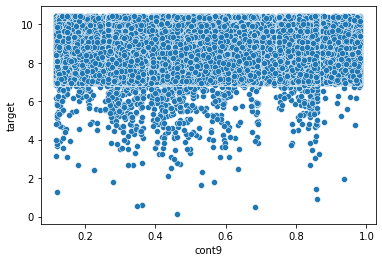

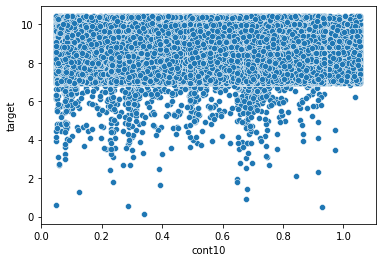

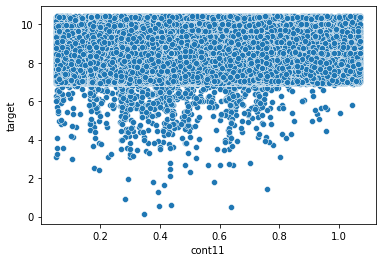

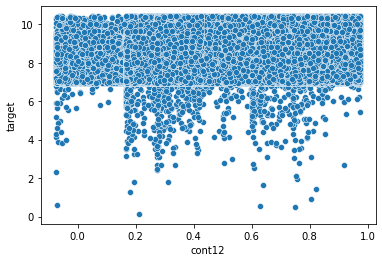

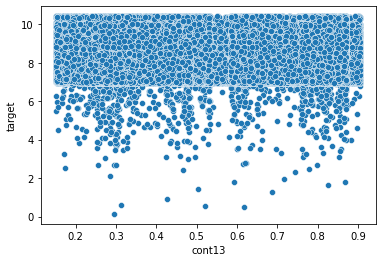

In [10]:
#See the continuous (numeric) variables and their relationship with target variable
for i,cname in enumerate(X.select_dtypes(['float'])):
    plt.figure(i)
    sns.scatterplot(x = cname, y = y, data = X)

In [11]:
#Divide category variables and numeric variables for ML
category_var = [col for col in X.columns if X[col].dtype == 'object']
numeric_var = [col for col in X.columns if X[col].dtype == 'float']

#Count the cardinality of the category variables
low_cardinality_cols = [col for col in category_var if X[col].nunique() < 10]
high_cardinality_cols = list(set(category_var) - set(low_cardinality_cols))

In [12]:
#Import ordinal encoding module and model selection to divide training and validation sets
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# If I use cross-validation, then train_test_split is no longer necessary since X_train'll be
# running on the entire dataset

# Old code in 1st attempt
# myOrdinalEncoder = OrdinalEncoder()
# #Ordinal encoding for categorical variables for both train & test datasets
# X_train[category_var] = myOrdinalEncoder.fit_transform(X_train[category_var])
# X_valid[category_var] = myOrdinalEncoder.transform(X_valid[category_var])
# X_test[category_var] = myOrdinalEncoder.transform(X_test[category_var])

#Adding in pipeline and Column Transformer to make preprocessing easier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [13]:
#Testing to see if dropping these variables'd improve score
#X.drop(['cat3', 'cat4','cat6', 'cat7'], axis = 'columns', inplace=True)
# --> The answer: dropping these variables do not improve score in the same Lin Reg model

#Rebuilt category_var after any dropping of X's variables
category_var = [col for col in X.columns if X[col].dtype == 'object']
print(category_var)

#Moving dataPreProcessingTransformer down here since it depends on category_var
dataPreProcessingTransformer = ColumnTransformer([
    ('category',OrdinalEncoder(),category_var)
     ],remainder='passthrough') # no change to non-categorical variables, they will
                                # will be processed as is

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


In [14]:
#Try Multiple Linear Regression first (for 1st attempt)
from sklearn.linear_model import LinearRegression
#New model: XGBoost (for 3rd attempt after figuring out the training/valid fold)
from xgboost import XGBRegressor
# Change the model below for different ML algorithm
model = LinearRegression(n_jobs = -1) #Using all processors for regression

#Pipeline to run preprocessing above and regression model
myPipeLine = Pipeline(steps=[('preprocessor', dataPreProcessingTransformer),
                              ('model', model)
                             ])

# Cross-validation to run on all data in 5 folds
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* RMSE
scores = -1 * cross_val_score(myPipeLine, X, y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
for i in range(len(scores)):
    print("RMSE of function is " + str(scores[i]))
    
#Get the fold with the best score:
fold_scores = {i+1:scores[i] for i in range(len(scores))}
best_kfold = min(fold_scores, key=fold_scores.get)
print("the best kth fold is the " + str(best_kfold) +"th fold")
#Note: for k = 10, what this means is that everything except the 10th fold, or the last
#10% of the data was used as training data, the 10th fold was used as validation data only

RMSE of function is 0.7370429974700861
RMSE of function is 0.7365586875308678
RMSE of function is 0.7457362059439439
RMSE of function is 0.7389199628528929
RMSE of function is 0.7366131991932701
RMSE of function is 0.7371332674487379
RMSE of function is 0.7419751599371878
RMSE of function is 0.7411896204146827
RMSE of function is 0.7412930051065787
RMSE of function is 0.7357177710263421
the best kth fold is the 10th fold


In [15]:
#Index is the 16th fold when CV = 100, thanks to this amazing tutorial
#https://www.kdnuggets.com/2019/11/set-operations-applied-pandas-dataframes.html
X_valid_indices = X.iloc[45000:48000,:]
union = pd.merge(X, X_valid_indices, how='outer') 
#This is the difference = union - intersection
X_train_indices = union[union.index.isin(X_valid_indices.index) == False]
#Get the indices
valid_indices = X_valid_indices.index
train_indices = X_train_indices.index

In [16]:
#Do the same to split y
y_valid_indices = y.iloc[45000:48000]
uniony = pd.merge(y, y_valid_indices, how='outer') 
y_train_indices = uniony[uniony.index.isin(y_valid_indices.index) == False]

In [17]:
#Fitting with the best k-fold by setting training dataset to 99%, excluding
#Splitting into 4 different datasets: X_train, X_valid, y_train, y_valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size = 0.9,
                                                      shuffle=False, #no randomness
                                                      )

# #Fitting the model
myPipeLine.fit(X_train,y_train)

# #Prediction from X_valid
trial_preds = myPipeLine.predict(X_valid)

# #Using mean squared error to grade the algorithm, have to take the root to find the RMSE
from sklearn.metrics import mean_squared_error
import math # to use sqrt function
trialScore = mean_squared_error(y_valid, trial_preds)
print("RMSE score is {} when the 16th fold out of 100 CV folds is used as \
hold out (or validation data)".format(math.sqrt(trialScore)))

RMSE score is 0.7357177710263421 when the 16th fold out of 100 CV folds is used as hold out (or validation data)


In [18]:
# test_predictions = myPipeLine.predict(X_test)
# #Convert the test predictions to 1-dimensional list (flat list for submission)
# results_preds_1dim = pd.Series(test_predictions.T[0])
# print(results_preds_1dim)

In [19]:
test_predictions = myPipeLine.predict(X_test)
# Run the code to save predictions in the format used for competition scoring
output = pd.DataFrame({'Id': X_test.id, 'target': test_predictions})
output.to_csv('2nd_attempt_submission.csv', index=False)